In [48]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

## Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [49]:
#load the dataset using pandas
import pandas as pd
import numpy as np
data=pd.read_csv("dataset.csv") 

In [50]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [51]:
#Getting the information about dataset
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [52]:
#Handling with missing data
#1.Impute missing values in numerical column based on the distribution
#for normally distributed data use: mean, median
data['bill_length_mm'].fillna(data['bill_length_mm'].median(),inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].median(),inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].median(),inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].median(),inplace=True)
#
#2. Impute missing values in 'sex' with the mode
data['sex'].fillna(data['sex'].mode()[0],inplace=True)

#verify that there are no more missing values
print(data.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\4015192571.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bill_length_mm'].fillna(data['bill_length_mm'].median(),inplace=True)
C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\4015192571.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

###  In this task, I checked the dataset for any missing or incorrect data, especially in key columns. If there were missing values, I handled them by either removing the rows or filling the missing values with the mean or median of that column. This ensures that the data is complete and ready for analysis.

In [53]:
print(data.describe())
print(data['sex'].value_counts())

       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      344.000000     344.000000         344.000000    344.000000
mean        43.881395      17.152035         200.892442   4272.674419
std          5.422500       1.969060          14.023826   1116.092060
min         32.100000      13.100000         172.000000   2700.000000
25%         39.275000      15.600000         190.000000   3550.000000
50%         44.100000      17.300000         197.000000   4050.000000
75%         48.400000      18.700000         213.000000   4781.250000
max         59.600000      21.500000         231.000000  15000.000000
sex
male       180
female     162
unknown      2
Name: count, dtype: int64


## Q2: What is the average body_mass_g for Gentoo penguins? (code)


In [54]:
#filter the dataset for Gentoo penguins and compute the mean
gentoo_mass=data[data['species']=='Gentoo']['body_mass_g']
print("The Average body_mass_g for Gentoo penguins is ", gentoo_mass.mean())

The Average body_mass_g for Gentoo penguins is  5125.0


###  To find the average body mass of Gentoo penguins, I filtered the dataset to include only rows where the species is Gentoo. Then, I calculated the mean value for the body_mass_g column, which gave me the average weight of Gentoo penguins in grams.

## Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [55]:
#importing libraries for analysis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew



Text(0, 0.5, 'Frequency')

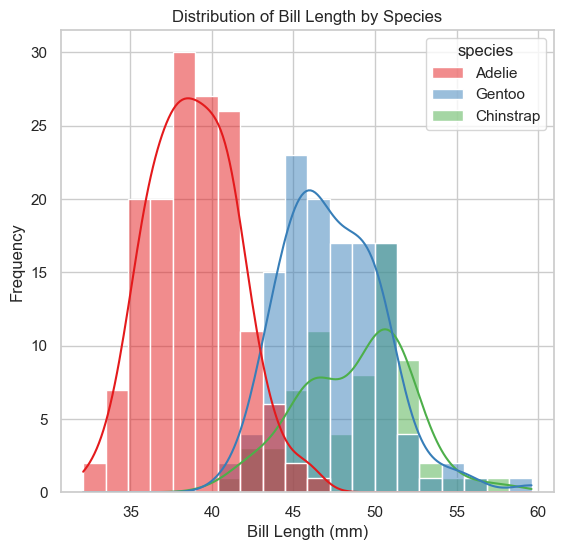

In [56]:
#vizualize the distribution for bill_length_mm and bill_depth_mm
species=data['species'].unique()
#1.Bill length distribution
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data,x='bill_length_mm',hue='species',kde=True,bins=20,palette='Set1')
plt.title('Distribution of Bill Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')

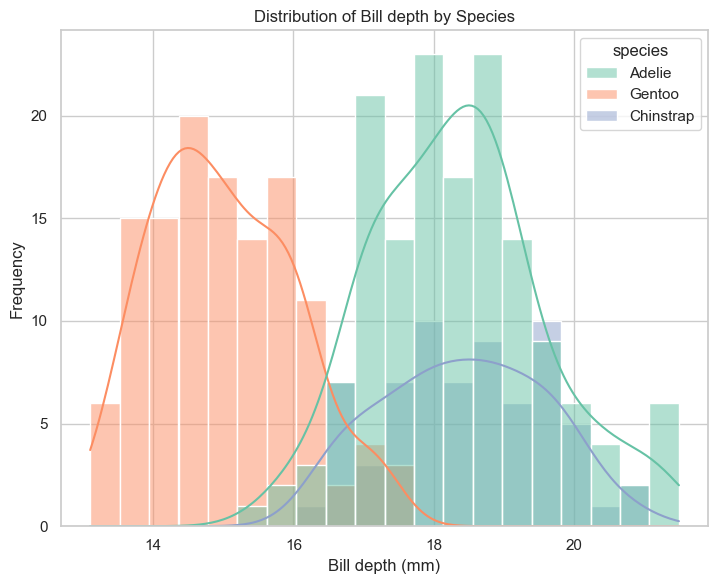

In [57]:
#2.Bill depth distribution
plt.figure(figsize=(14,6))
plt.subplot(1,2,2)
sns.histplot(data,x='bill_depth_mm',hue='species',kde=True,bins=20,palette='Set2')
plt.title('Distribution of Bill depth by Species')
plt.xlabel('Bill depth (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [58]:
#calculate Skewness and Kurtosis
results = []
for sp in species:
    sp_data = data[data['species'] == sp]
    skew_bill_length = skew(sp_data['bill_length_mm'])
    kurtosis_bill_length = kurtosis(sp_data['bill_length_mm'])
    skew_bill_depth = skew(sp_data['bill_depth_mm'])
    kurtosis_bill_depth = kurtosis(sp_data['bill_depth_mm'])
    
    results.append({
        'Species': sp,
        'Skewness (Bill Length)': skew_bill_length,
        'Kurtosis (Bill Length)': kurtosis_bill_length,
        'Skewness (Bill Depth)': skew_bill_depth,
        'Kurtosis (Bill Depth)': kurtosis_bill_depth,
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display skewness and kurtosis
print("Skewness and Kurtosis for Bill Length and Bill Depth by Species:")
print(results_df)


Skewness and Kurtosis for Bill Length and Bill Depth by Species:
     Species  Skewness (Bill Length)  Kurtosis (Bill Length)  \
0     Adelie                0.166475               -0.224485   
1     Gentoo                0.720893                1.177040   
2  Chinstrap               -0.093203               -0.119069   

   Skewness (Bill Depth)  Kurtosis (Bill Depth)  
0               0.329567              -0.096039  
1               0.346413              -0.584449  
2               0.006726              -0.898740  


#### For this question, I analyzed the distribution of bill_length_mm and bill_depth_mm for each penguin species. I calculated the skewness and kurtosis of these features for each species to understand how their distributions differ. Skewness shows whether the data is skewed to one side, while kurtosis indicates the "peakedness" of the distribution.

## Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

In [59]:
#list the numeric columns
numeric_columns=['bill_length_mm','bill_length_mm','flipper_length_mm','body_mass_g']
# Dictionary to store outlier information
outlier_info = {}

# 1. Detect outliers using the IQR method
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                     # Interquartile range
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_info[column] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers),
        'Outlier Indices': outliers.index.tolist()
    }

In [60]:
# 2. Display outlier information
print("Outlier Information:")
for feature, details in outlier_info.items():
    print(f"\nFeature: {feature}")
    print(f"Lower Bound: {details['Lower Bound']}")
    print(f"Upper Bound: {details['Upper Bound']}")
    print(f"Number of Outliers: {details['Number of Outliers']}")
    print(f"Outlier Indices: {details['Outlier Indices']}")

Outlier Information:

Feature: bill_length_mm
Lower Bound: 25.5875
Upper Bound: 62.0875
Number of Outliers: 0
Outlier Indices: []

Feature: flipper_length_mm
Lower Bound: 155.5
Upper Bound: 247.5
Number of Outliers: 0
Outlier Indices: []

Feature: body_mass_g
Lower Bound: 1703.125
Upper Bound: 6628.125
Number of Outliers: 3
Outlier Indices: [73, 206, 324]


C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\830565680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, palette='Set2')
C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\830565680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, palette='Set2')
C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\830565680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, palette='Set2')
C:\Users\jothi\AppData\Local\Temp\ipykernel_6040\830565680.py:6: FutureWarning: 

Passing `palette` wit

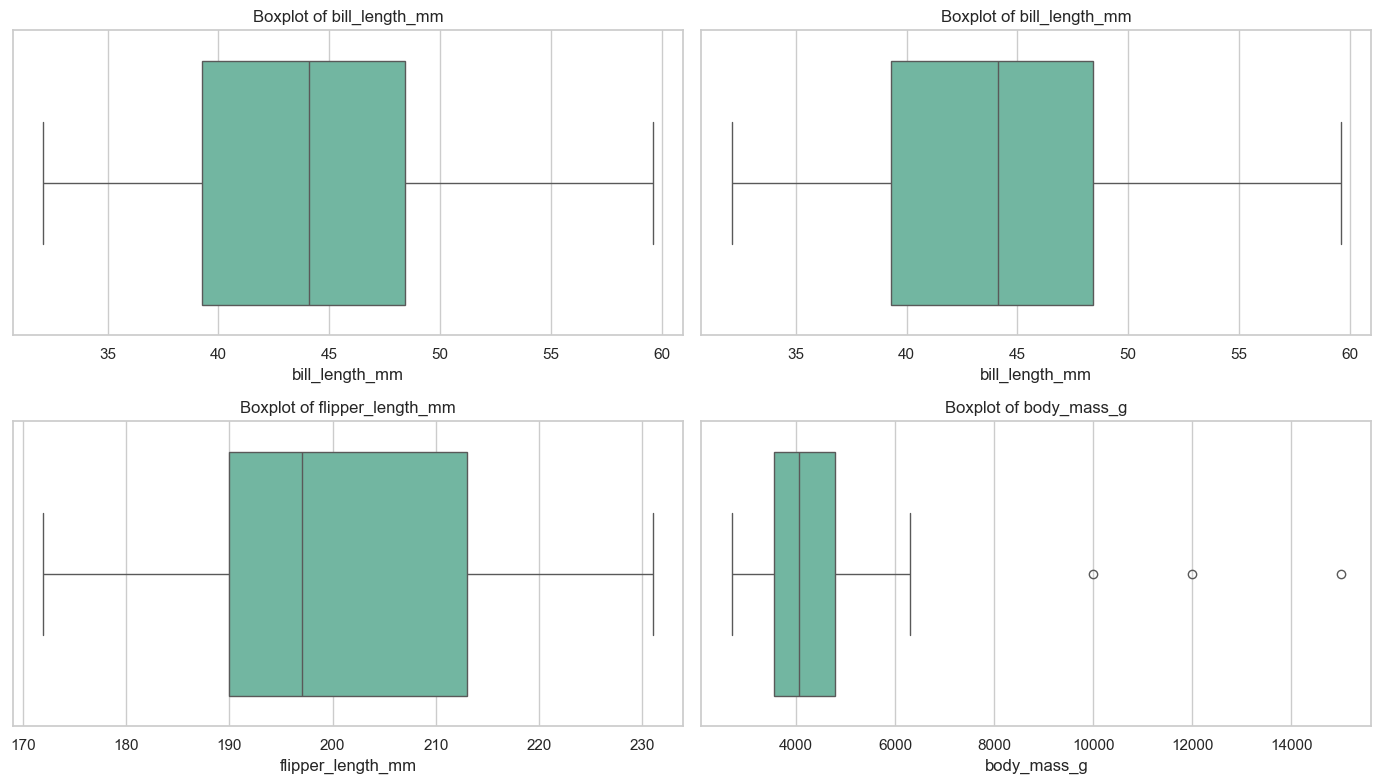

In [61]:
# 3. Visualize outliers using boxplots
plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=column, palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

#### I identified outliers in the dataset by using statistical methods like the Interquartile Range (IQR) or z-scores. Outliers are values that are far away from the majority of the data. I then visualized these outliers using boxplots, which help to clearly show any data points that stand out as unusually high or low.

## Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

## No, this dataset does not contribute to the Curse of dimensionality.
#### The "curse of dimensionality" occurs when a dataset has too many features, making analysis harder. In this dataset, with only 7 columns, the curse of dimensionality is not a concern. However, if there were many more features, I would use Principal Component Analysis (PCA) to reduce the dimensionality and retain the most important information for analysis.


## Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)


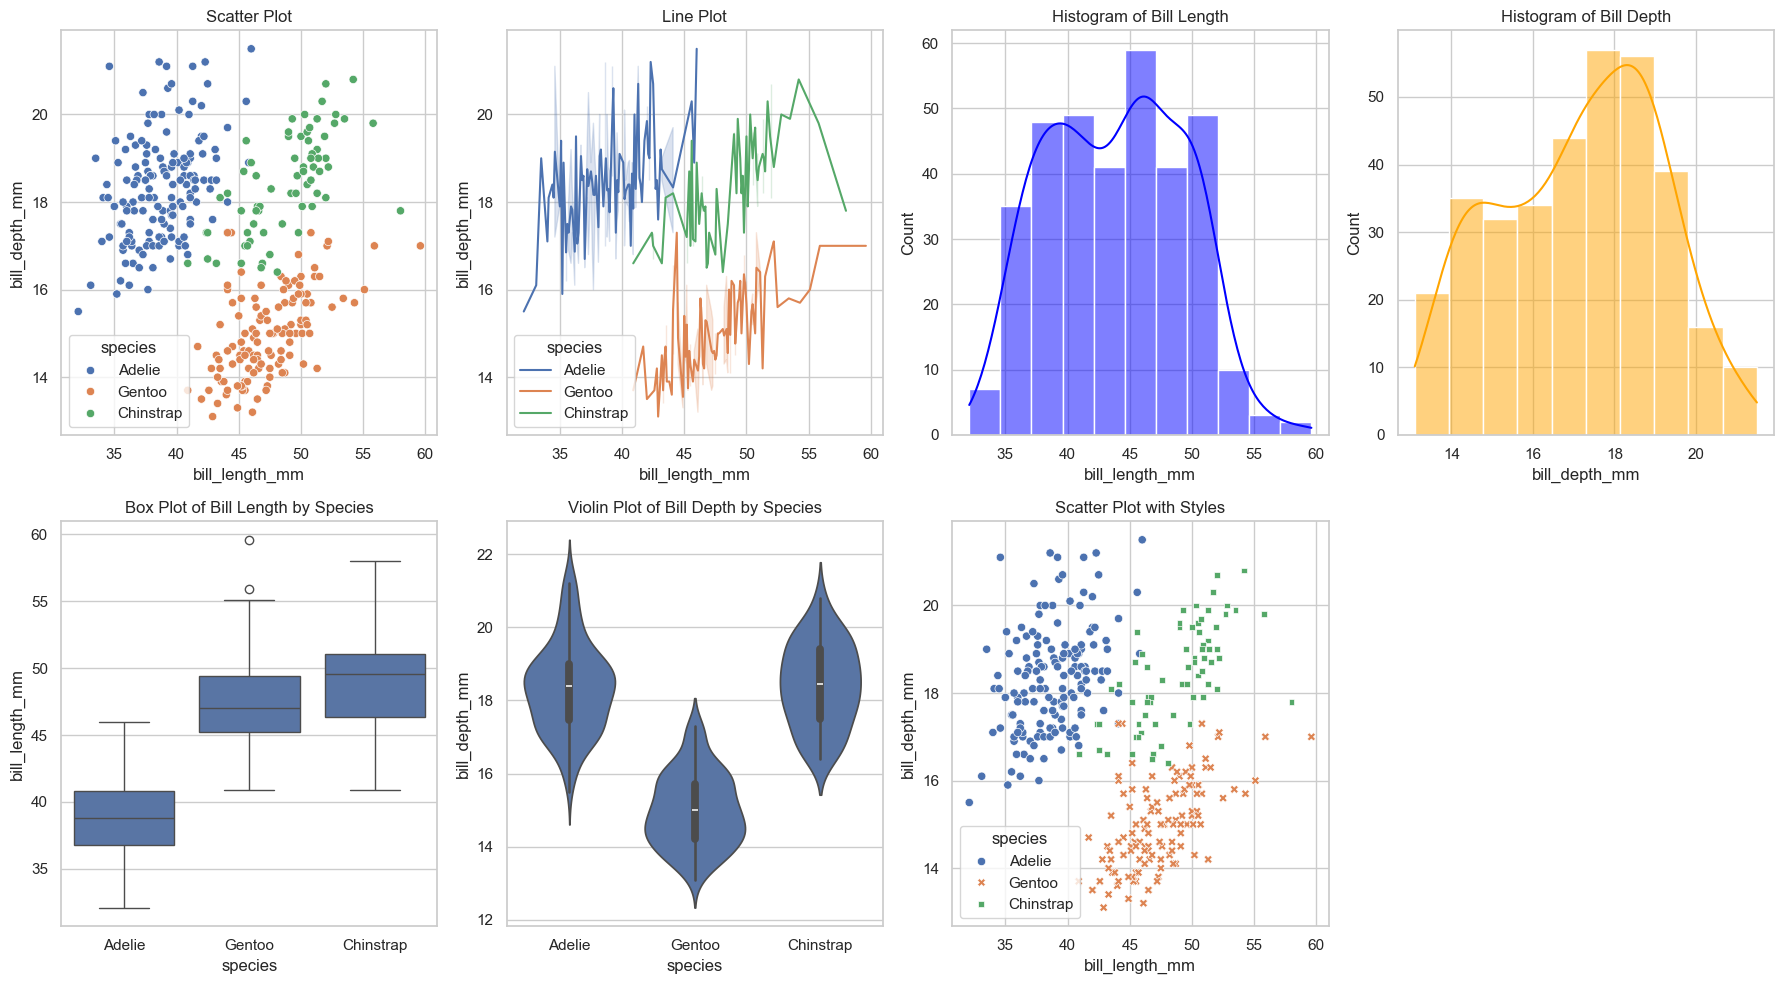

In [62]:
# Set plot style
sns.set(style="whitegrid")

# Initialize a 2x4 grid for subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
# Plot 1: Scatter Plot
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0])
axes[0].set_title('Scatter Plot')

# Plot 2: Line Plot
sns.lineplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[1])
axes[1].set_title('Line Plot')

## Plot 3: Histogram (bill_length_mm)
sns.histplot(data['bill_length_mm'], kde=True, color='blue', ax=axes[2])
axes[2].set_title('Histogram of Bill Length')
# Plot 4: Histogram (bill_depth_mm)
sns.histplot(data['bill_depth_mm'], kde=True, color='orange', ax=axes[3])
axes[3].set_title('Histogram of Bill Depth')

# Plot 5: Box Plot
sns.boxplot(data=data, x='species', y='bill_length_mm', ax=axes[4])
axes[4].set_title('Box Plot of Bill Length by Species')

# Plot 6: Violin Plot
sns.violinplot(data=data, x='species', y='bill_depth_mm', ax=axes[5])
axes[5].set_title('Violin Plot of Bill Depth by Species')

# Plot 7: Pair Plot (focused on bill_length_mm and bill_depth_mm)
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', ax=axes[6])
axes[6].set_title('Scatter Plot with Styles')

# Remove the last unused subplot
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

### For this task, I visualized the relationship between bill_length_mm and bill_depth_mm by creating 7 different types of graphs. This helped me to explore the data in various ways and understand how these two features are related across the penguin species.

## Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)


In [63]:
# Drop rows with missing values in 'flipper_length_mm'
data = data.dropna(subset=['flipper_length_mm'])

# Find the maximum flipper length for each species and island
max_flipper = data.groupby(['species', 'island'])['flipper_length_mm'].max()

# Find the species with the longest flippers on each island
longest_flippers_by_island = max_flipper.reset_index().sort_values('flipper_length_mm', ascending=False).drop_duplicates('island')

# Display the results
print("Maximum flipper length for each species and island:\n", max_flipper)
print("\nSpecies with the longest flippers on each island:\n", longest_flippers_by_island)


Maximum flipper length for each species and island:
 species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64

Species with the longest flippers on each island:
      species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


### I grouped the data by both species and island and found the maximum value of flipper_length_mm for each combination. This shows which species has the longest flippers on each island, giving insights into species-specific characteristics across different locations.

## Q8: Perform z-score normalization on this dataset. (code)

In [64]:
#Applying Z-Score Normalization to Numeric Columns
from scipy.stats import zscore

numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].apply(zscore)
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  


### Z-score normalization standardizes the data by transforming it to have a mean of 0 and a standard deviation of 1. I applied this technique to the numerical features of the dataset (like bill_length_mm, flipper_length_mm, etc.) to make the data easier to compare, especially since these features are measured on different scales.